<h1 style="text-align:center; font-size: 36px; color: #2E86C1; font-weight: bold;">🚀 Sentiment-Analysis-with-BERT 🚀</h1>


# important libraries

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


# Instantiate Model

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

# Encode and Calculate Sentiment (example)

In [3]:
tokens = tokenizer.encode('very nice', return_tensors='pt')


In [4]:
result = model(tokens)

In [5]:
result.logits


tensor([[-2.3351, -2.3362, -0.6745,  1.8895,  2.6163]],
       grad_fn=<AddmmBackward0>)

In [6]:
int(torch.argmax(result.logits))+1


5

# Encode and Calculate Sentiment for the data


In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv("/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv")

In [8]:
data[['score', 'content']]

,score,content
0,5,best movie app ever 😇
1,4,It is good but they should stop the household ...
2,5,it's a amazing app in my opinion i give this 5...
3,2,I used to love Netflix but now for some reason...
4,3,its not working since yesterday. i tried clear...
...,...,...
131942,5,i really like it! there are so many movies and...
131943,5,I love Netflix. I always enjoy my time using it.
131944,1,Sound quality is very slow of movies
131945,1,Rate is very expensive.. bcos we see netflix s...


In [9]:
data['score'].value_counts()

score
1    51665
5    40106
4    15128
3    13105
2    11943
Name: count, dtype: int64

# sentiment analysis 

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.DataFrame(np.array(data['content']), columns=['content'])


In [12]:
df


,content
0,best movie app ever 😇
1,It is good but they should stop the household ...
2,it's a amazing app in my opinion i give this 5...
3,I used to love Netflix but now for some reason...
4,its not working since yesterday. i tried clear...
...,...
131942,i really like it! there are so many movies and...
131943,I love Netflix. I always enjoy my time using it.
131944,Sound quality is very slow of movies
131945,Rate is very expensive.. bcos we see netflix s...


In [13]:
df['content'].iloc[3]


'I used to love Netflix but now for some reason I cannot watch it everywhere I go except from home, so unfortunate, I hope they fix this'

In [30]:
def sentiment_score(review):
    
    tokens = tokenizer.encode(review, return_tensors='pt')
    
    result = model(tokens)
    
    return int(torch.argmax(result.logits))+1

In [16]:
from tqdm import tqdm
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

my_scores = []

for sentence in tqdm(df['content'].astype(str), desc="Processing Sentences", unit="sentence"):
    # Convert to string (ensures no non-string values)
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True).to(device)

    with torch.no_grad():  # Disable gradients for faster inference
        output = model(**inputs)
        pred = torch.argmax(output.logits, dim=1).item()  # Get predicted class
    
    my_scores.append(pred)  # Store result


Processing Sentences: 100%|██████████| 131947/131947 [16:26<00:00, 133.75sentence/s]


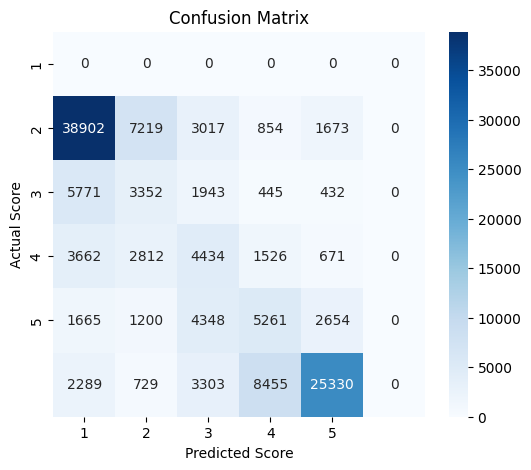

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data['score'], my_scores)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.title("Confusion Matrix")
plt.show()


In [28]:

print(data['content'].iloc[1])
print(my_scores[1])
print(data['score'].iloc[1])


It is good but they should stop the household thingy magc like my relative is paying and he is a neighbour so pls stop Netflix would be way better without it
2
4


## we can see my score is kinda better than the dataset scored .... bert is really nice 🤖💡💯

<h2 style="color: #27AE60; font-size: 28px;">📌 You too can try it here 😃</h2>


In [49]:
def sentiment_score(review):
    
    tokens = tokenizer.encode(review, return_tensors='pt').to(device)  
    
    result = model(tokens)
    
    return int(torch.argmax(result.logits))+1


In [52]:
user_review = input("input your review")


sentiment_score(user_review)

input your review very very good


5